<a href="https://colab.research.google.com/github/nickoDB/NYSE-Stock-Predictor/blob/main/NYSEpredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [136]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Import dataset and import libraries.**



In [137]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [138]:
prices_df = pd.read_csv('/content/drive/MyDrive/NYSE/prices.csv')
prices_df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


**Data Exploration.**

In [139]:
print(prices_df.shape)

(851264, 7)


In [140]:
prices_df.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,70.836986,70.857109,70.118414,71.543476,5.415113e+06
std,83.695876,83.689686,82.877294,84.465504,1.249468e+07
min,0.850000,0.860000,0.830000,0.880000,0.000000e+00
25%,33.840000,33.849998,33.480000,34.189999,1.221500e+06
50%,52.770000,52.799999,52.230000,53.310001,2.476250e+06
75%,79.879997,79.889999,79.110001,80.610001,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [141]:
#checking for null values
prices_df.isnull().sum()

,0
date,0
symbol,0
open,0
close,0
low,0
high,0
volume,0


In [142]:
prices_df.date.unique()

array(['2016-01-05 00:00:00', '2016-01-06 00:00:00',
       '2016-01-07 00:00:00', ..., '2016-12-28', '2016-12-29',
       '2016-12-30'], dtype=object)

**Import securities csv file.**

In [143]:
securities_df = pd.read_csv('/content/drive/MyDrive/NYSE/securities.csv')
securities_df.head()

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373
4,ATVI,Activision Blizzard,reports,Information Technology,Home Entertainment Software,"Santa Monica, California",2015-08-31,718877


In [144]:
#count number of unique "Ticker symbols"
securities_df["Ticker symbol"].nunique()

505

In [145]:
securities_df.loc[securities_df.Security.str.startswith('Am'), :]


,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
26,AMZN,Amazon.com Inc,reports,Consumer Discretionary,Internet & Direct Marketing Retail,"Seattle, Washington",2005-11-18,1018724
27,AEE,Ameren Corp,reports,Utilities,MultiUtilities,"St. Louis, Missouri",1991-09-19,1002910
28,AAL,American Airlines Group,reports,Industrials,Airlines,"Fort Worth, Texas",2015-03-23,6201
29,AEP,American Electric Power,reports,Utilities,Electric Utilities,"Columbus, Ohio",NaN,4904
30,AXP,American Express Co,reports,Financials,Consumer Finance,"New York, New York",1976-06-30,4962
31,AIG,"American International Group, Inc.",reports,Financials,Property & Casualty Insurance,"New York, New York",1980-03-31,5272
32,AMT,American Tower Corp A,reports,Real Estate,Specialized REITs,"Boston, Massachusetts",2007-11-19,1053507
33,AWK,American Water Works Company Inc,reports,Utilities,Water Utilities,"Voorhees, New Jersey",2016-03-04,1410636
34,AMP,Ameriprise Financial,reports,Financials,Asset Management & Custody Banks,"Minneapolis, Minnesota",NaN,820027
35,ABC,AmerisourceBergen Corp,reports,Health Care,Health Care Distributors,"Chesterbrook, Pennsylvania",NaN,1140859


**Selected 6 companies for visualizations on opening and closing stock prices.**

In [146]:
securities_plot = securities_df.loc[(securities_df["Security"] == 'Nvidia Corporation') | (securities_df["Security"] == 'AMD') | (securities_df["Security"] == 'Pfizer Inc.') | (securities_df["Security"] == 'Chevron Corp.') | (securities_df["Security"] == 'Target Corp.') | (securities_df["Security"] == 'Costco Co.') , ["Ticker symbol"] ]["Ticker symbol"]
print(securities_plot)

98      CVX
124    COST
339    NVDA
355     PFE
425     TGT
Name: Ticker symbol, dtype: object


In [147]:
def plotter(code):
    global closing_stock
    global opening_stock

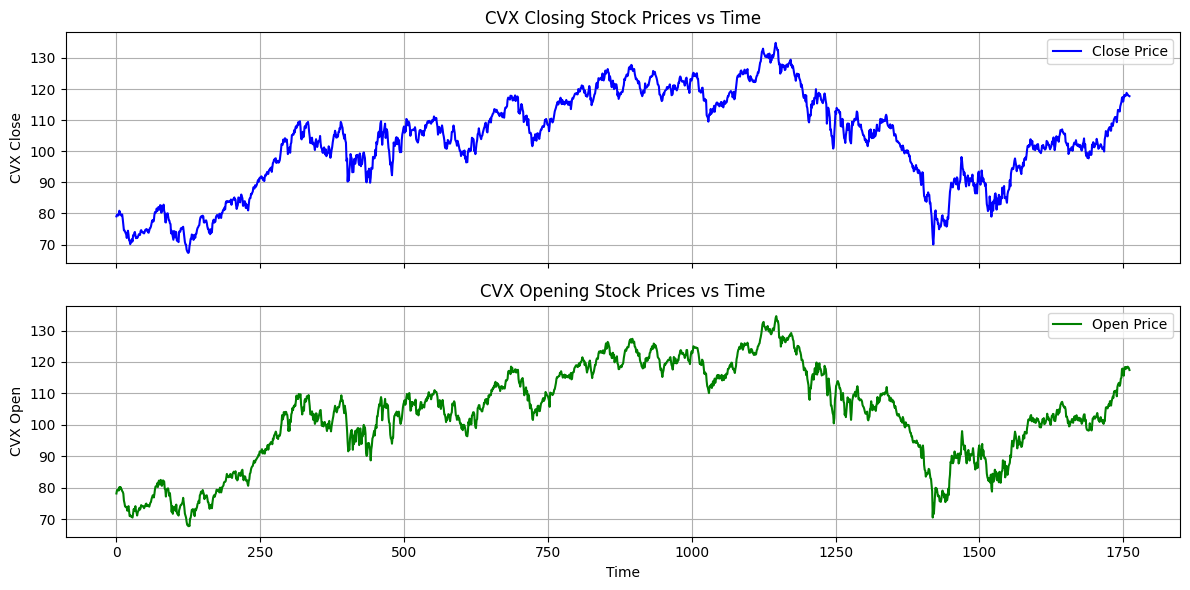

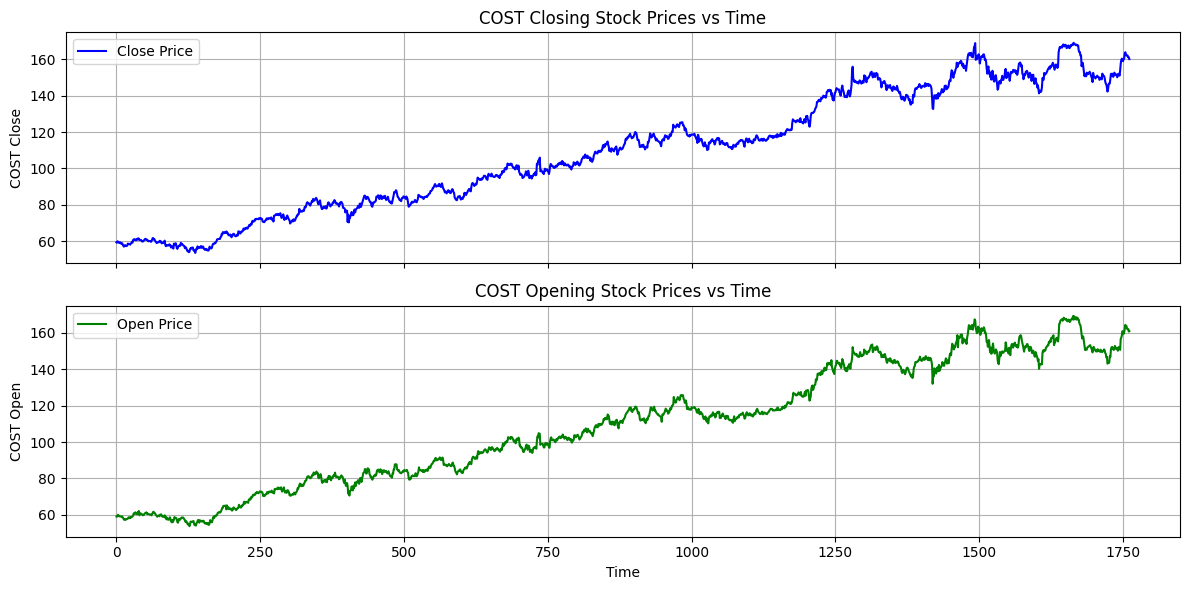

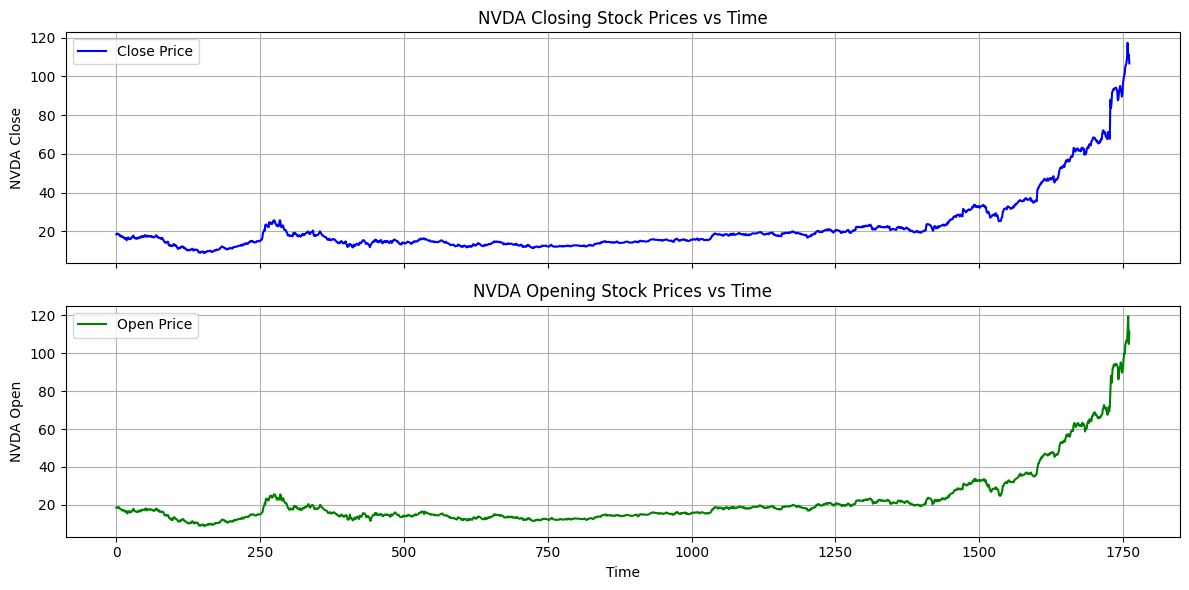

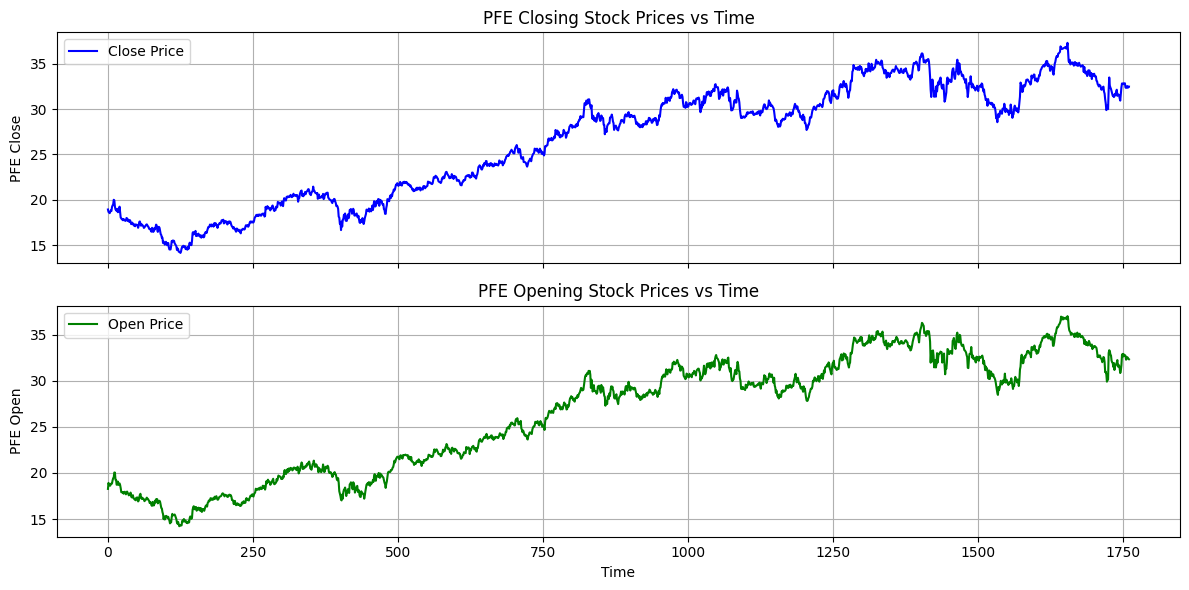

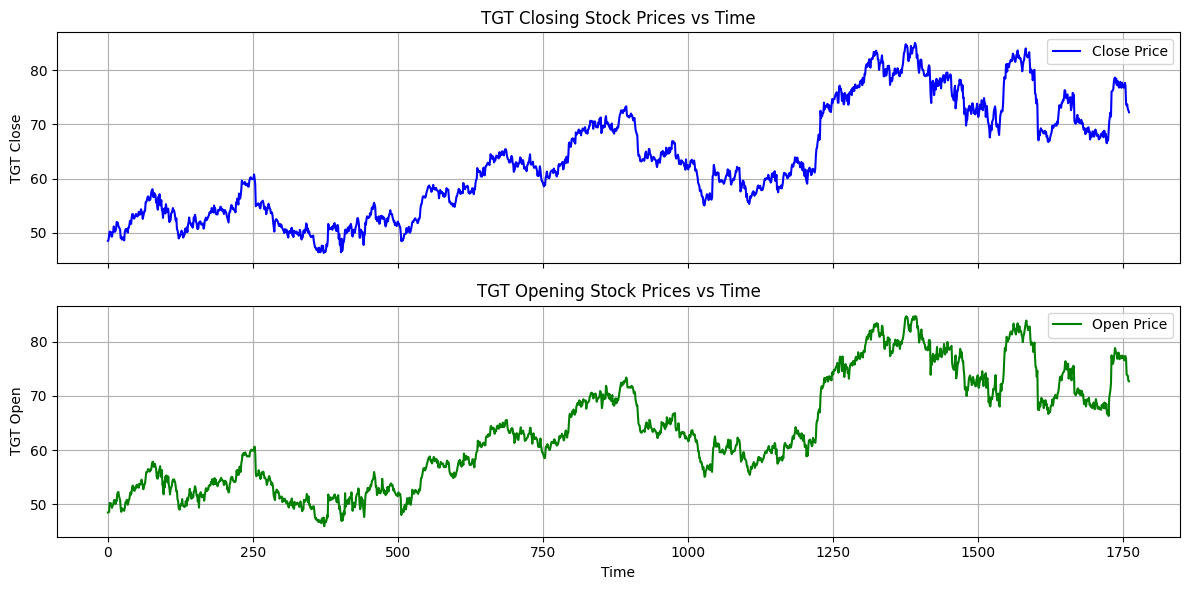

In [148]:
import matplotlib.pyplot as plt

def plotter(code):
    global closing_stock
    global opening_stock

    company = prices_df[prices_df['symbol'] == code]

    # Store as 2D array
    opening_stock = company.open.values.astype('float32').reshape(-1, 1)
    closing_stock = company.close.values.astype('float32').reshape(-1, 1)

    # Plot using 1D (flatten for matplotlib)
    fig, axs = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

    axs[0].plot(closing_stock.ravel(), 'b', label='Close Price')
    axs[0].set_ylabel(f"{code} Close")
    axs[0].set_title(f"{code} Closing Stock Prices vs Time")
    axs[0].grid(True)
    axs[0].legend()

    axs[1].plot(opening_stock.ravel(), 'g', label='Open Price')
    axs[1].set_ylabel(f"{code} Open")
    axs[1].set_title(f"{code} Opening Stock Prices vs Time")
    axs[1].set_xlabel("Time")
    axs[1].grid(True)
    axs[1].legend()

    plt.tight_layout()
    plt.show()

# Example loop
for i in securities_plot:
    plotter(i)


**Single stock to sample forecast future stock price.**

In [149]:
closing_stock[: , 0]

array([48.55, 48.73, 49.66, ..., 72.83, 72.62, 72.23], dtype=float32)

In [150]:
stocks = closing_stock[: , 0]
print(stocks)
#convert to 2d column vector
stocks = stocks.reshape(len(stocks) , 1)

[48.55 48.73 49.66 ... 72.83 72.62 72.23]


In [151]:
#vector scaling for model performance
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
stocks = scaler.fit_transform(stocks)

In [152]:
train = int(len(stocks)* 0.80)
test = len(stocks) - train

In [153]:
print(train, test)

1409 353


In [154]:
train = stocks[0:train]
print(train)

[[0.05739391]
 [0.06204748]
 [0.08609092]
 ...
 [0.8715097 ]
 [0.8585831 ]
 [0.84410536]]


In [155]:
test = stocks[len(train) : ]

In [156]:
train = train.reshape(len(train) , 1)
test = test.reshape(len(test) , 1)
print(train.shape, test.shape)

(1409, 1) (353, 1)


In [157]:
def process_data(data, n_features):
  dataX, dataY = [], []
  for i in range(len(data)-n_features):
      a = data[i:(i+n_features), 0]
      dataX.append(a)
      dataY.append(data[i + n_features])
  return np.array(dataX), np.array(dataY)


In [158]:
n_features = 2

trainX, trainY, = process_data(train, n_features)
testX, testY = process_data(test, n_features)

In [159]:
print(trainX.shape , trainY.shape , testX.shape , testY.shape)

(1407, 2) (1407, 1) (351, 2) (351, 1)


In [160]:
trainX = trainX.reshape(trainX.shape[0] , 1 ,trainX.shape[1])
testX = testX.reshape(testX.shape[0] , 1 ,testX.shape[1])

In [161]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense , BatchNormalization , Dropout , Activation
from keras.layers import LSTM , GRU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.optimizers import Adam , SGD , RMSprop

In [162]:
filepath="stock_weights.keras"
from keras.callbacks import ReduceLROnPlateau , ModelCheckpoint
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.1, epsilon=0.0001, patience=1, verbose=1)
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='max')

In [163]:
model = Sequential()
model.add(GRU(256 , input_shape = (1 , n_features) , return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(256))
model.add(Dropout(0.4))
model.add(Dense(64 ,  activation = 'relu'))
model.add(Dense(1))
print(model.summary())

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_4 (GRU)                     │ (None, 1, 256)         │       199,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 1, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 256)            │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 741,505 (2.83 MB)

 Trainable params: 741,505 (2.83 MB)

 Non-trainable params: 0 (0.00 B)

None


In [164]:
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate = 0.0005) , metrics = ['mean_squared_error'])

In [165]:
history = model.fit(trainX, trainY, epochs=100 , batch_size = 32 ,
          callbacks = [checkpoint , lr_reduce] , validation_data = (testX,testY))

Epoch 1/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1171 - mean_squared_error: 0.1171
Epoch 1: val_loss improved from -inf to 0.02745, saving model to stock_weights.keras
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.1159 - mean_squared_error: 0.1159 - val_loss: 0.0274 - val_mean_squared_error: 0.0274 - learning_rate: 5.0000e-04
Epoch 2/100
41/44 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0070 - mean_squared_error: 0.0070
Epoch 2: val_loss did not improve from 0.02745
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0068 - mean_squared_error: 0.0068 - val_loss: 0.0012 - val_mean_squared_error: 0.0012 - learning_rate: 5.0000e-04
Epoch 3/100
40/44 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0021 - mean_squared_error: 0.0021
Epoch 3: val_loss did not improve from 0.02745

Epoch 3: ReduceLROnPlateau reducing learning rate to 5.0000002374872565e-05.
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0011 - val_mean_squared_error

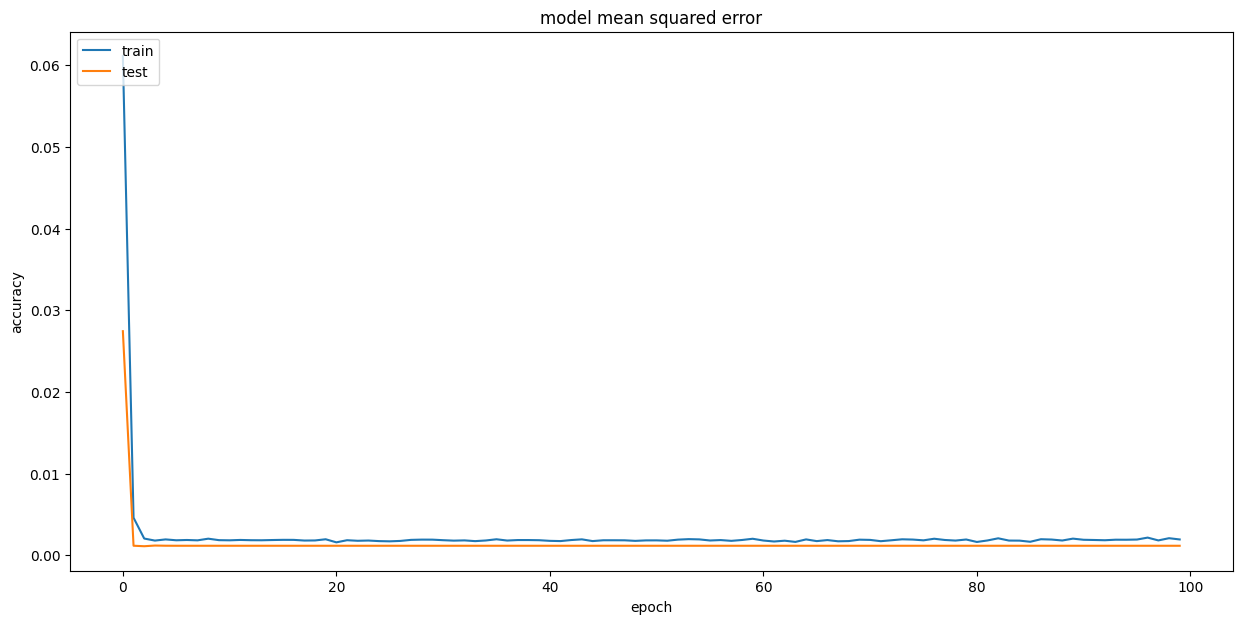

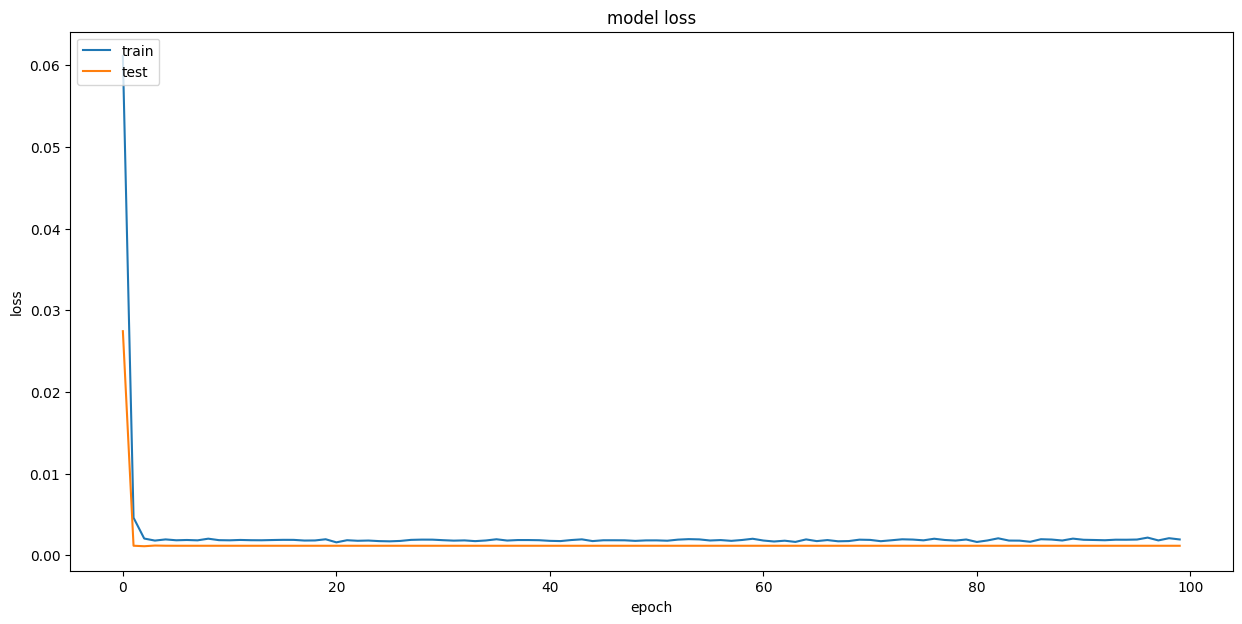

In [166]:
import matplotlib.pyplot as plt

plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('model mean squared error')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [167]:
def model_score(model, X_train, y_train, X_test, y_test):
    trainScore = model.evaluate(X_train, y_train, verbose=0)
    print('Train Score: %.5f MSE (%.2f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))
    testScore = model.evaluate(X_test, y_test, verbose=0)
    print('Test Score: %.5f MSE (%.2f RMSE)' % (testScore[0], math.sqrt(testScore[0])))
    return trainScore[0], testScore[0]

model_score(model, trainX, trainY , testX, testY)

Train Score: 0.00052 MSE (0.02 RMSE)
Test Score: 0.00117 MSE (0.03 RMSE)


(0.0005211413372308016, 0.0011741260532289743)

In [168]:
pred = model.predict(testX)
pred = scaler.inverse_transform(pred)
pred[:10]

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


array([[78.727776],
       [78.737366],
       [78.80502 ],
       [78.98096 ],
       [78.995804],
       [79.45521 ],
       [80.486694],
       [80.701454],
       [79.4369  ],
       [76.61174 ]], dtype=float32)

In [169]:
testY = testY.reshape(testY.shape[0] , 1)
testY = scaler.inverse_transform(testY)
testY[:10]

array([[79.  ],
       [78.99],
       [79.35],
       [78.98],
       [80.3 ],
       [80.87],
       [80.66],
       [78.4 ],
       [75.28],
       [73.94]], dtype=float32)

Red - Predicted Stock Prices  ,  Blue - Actual Stock Prices


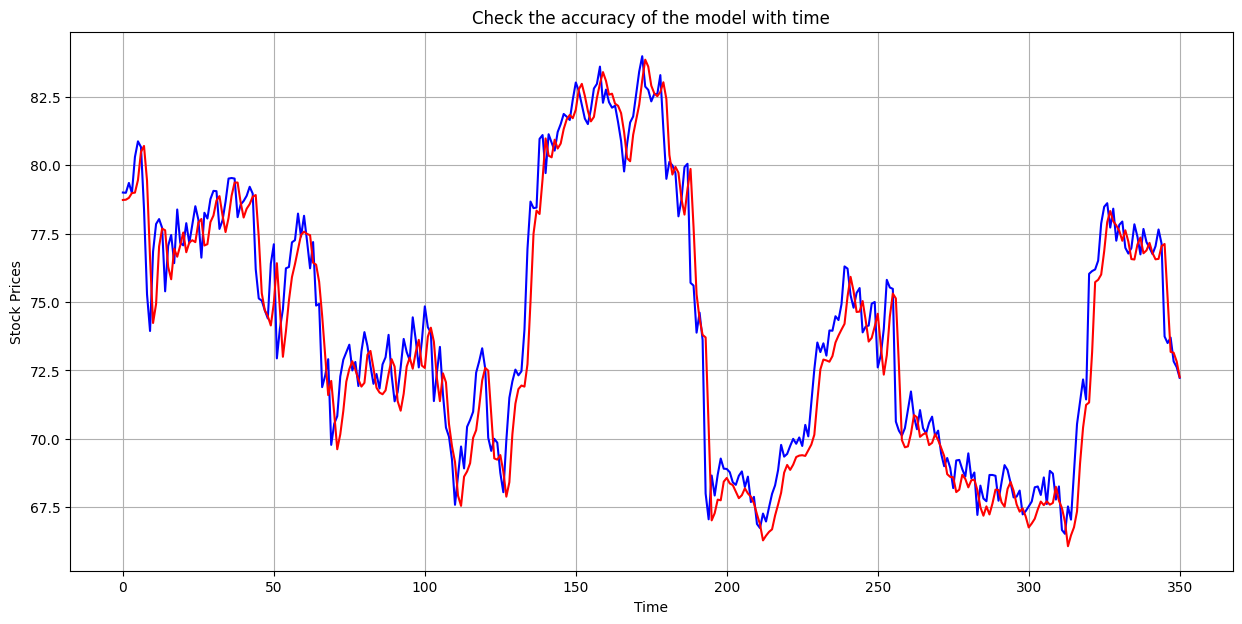

In [170]:
print("Red - Predicted Stock Prices  ,  Blue - Actual Stock Prices")
plt.rcParams["figure.figsize"] = (15,7)
plt.plot(testY , 'b')
plt.plot(pred , 'r')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.title('Check the accuracy of the model with time')
plt.grid(True)
plt.show()